In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Data Collection and Preprocessing

In [2]:
dataset_df = pd.read_csv('train.csv')

In [3]:
dataset_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
dataset_df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [6]:
X = dataset_df.drop(['Date', 'GLD'],axis=1)
Y = dataset_df['GLD']

In [7]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [8]:
Y

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
5,86.550003
6,88.250000
7,88.580002
8,89.540001
9,87.989998


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [10]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


# Model Building and Testing

In [11]:
model = RandomForestRegressor()

In [12]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [14]:
training_prediction = model.predict(X_train)
training_data_r2_score = r2_score(Y_train, training_prediction)
print(training_data_r2_score)

0.9985791218177178


In [15]:
test_prediction = model.predict(X_test)
test_data_r2_score = r2_score(Y_test, test_prediction)
print(test_data_r2_score)

0.9900625500706932


In [23]:
Y_test

,GLD
903,168.020004
129,81.230003
1787,112.320000
1913,127.589996
2048,119.620003
996,154.210007
769,148.910004
2134,126.190002
1485,117.470001
1441,125.739998


In [24]:
Y_test = list(Y_test)

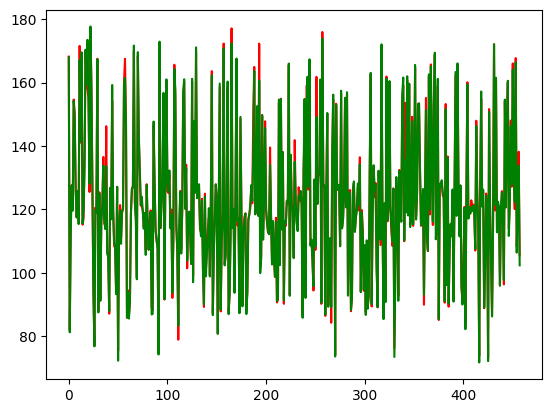

In [25]:
plt.plot(test_prediction,color='red')
plt.plot(Y_test, color='green')
plt.show()